## Test Notebook to study the basic syntax of Keras

In [89]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# load data

df = pd.read_csv('../Notebooks_and_Data/DATA/fake_reg.csv')
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [6]:
# EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


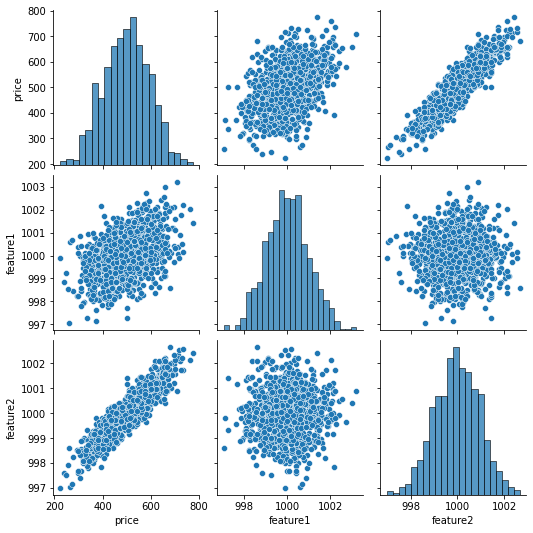

In [9]:
sns.pairplot(df)

### Splitting the data into train and test

In [10]:
# split the data
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['price'], axis = 1),
                                                   df['price'],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((700, 2), (300, 2))

### Normalizing and Scaling the data

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()

In [14]:
# fit using training data
scaler.fit(X_train)

MinMaxScaler()

In [15]:
# transform both train and test data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
X_train.max(), X_train.min()

(1.0, 0.0)

## Import Tensorflow and Keras

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [20]:
help(Sequential)

Help on class Sequential in module keras.engine.sequential:

class Sequential(keras.engine.functional.Functional)
 |  Sequential(*args, **kwargs)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(tf.keras.layers.Dense(4))
 |  
 |  # This is identical to the following:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.Input(shape=(16,)))
 |  model.add(tf.keras.layers.Dense(8))
 |  
 |  # Note that you can also omit the `input_shape` argument.
 |  # In that case the model doesn't have any weights until the first call
 |  # to a training/evaluation method (since it isn't yet built):
 |  model = tf.keras.Sequentia

## Creating a Model

There are two ways to create models through the TF 2 Keras API, either pass in a list of layers all at once, or add them one by one.

Let's see both methods

### Model - as a list of layers

In [22]:
# creating a model of 3 layers, each layer of 2 nodes given by the units
model = Sequential([Dense(units=2),
                    Dense(units=2),
                    Dense(units=2)])

### Model - adding in layers - one by one

In [23]:
model = Sequential()

model.add(Dense(units = 2))
model.add(Dense(units = 2))
model.add(Dense(units = 2))

### Building a simple model and then compiling it using a solver

In [24]:
model = Sequential()

model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))

# final output node for prediction
model.add(Dense(1))

In [25]:
# compiling the model

# optimizer : gradient descent that will be use to optimize the loss function 
# loss : the loss function that we are trying to minimize: in this case mse
model.compile(optimizer='rmsprop', loss='mse')

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

# Training

Below are some common definitions that are necessary to know and understand to correctly utilize Keras:

* Sample: one element of a dataset.
    * Example: one image is a sample in a convolutional network
    * Example: one audio file is a sample for a speech recognition model
* Batch: a set of N samples. The samples in a batch are processed independently, in parallel. If training, a batch results in only one update to the model.A batch generally approximates the distribution of the input data better than a single input. The larger the batch, the better the approximation; however, it is also true that the batch will take longer to process and will still result in only one update. For inference (evaluate/predict), it is recommended to pick a batch size that is as large as you can afford without going out of memory (since larger batches will usually result in faster evaluation/prediction).
* Epoch: an arbitrary cutoff, generally defined as "one pass over the entire dataset", used to separate training into distinct phases, which is useful for logging and periodic evaluation.
* When using validation_data or validation_split with the fit method of Keras models, evaluation will be run at the end of every epoch.
* Within Keras, there is the ability to add callbacks specifically designed to be run at the end of an epoch. Examples of these are learning rate changes and model checkpointing (saving).

In [26]:
# fitting the model
model.fit(X_train, y_train,epochs=250)

Epoch 1/250
22/22 [==============================] - 2s 3ms/step - loss: 257421.6250
Epoch 2/250
22/22 [==============================] - 0s 2ms/step - loss: 257225.8438
Epoch 3/250
22/22 [==============================] - 0s 1ms/step - loss: 257064.2031
Epoch 4/250
22/22 [==============================] - 0s 1ms/step - loss: 256902.4531
Epoch 5/250
22/22 [==============================] - 0s 1ms/step - loss: 256721.9219
Epoch 6/250
22/22 [==============================] - 0s 1ms/step - loss: 256512.8906
Epoch 7/250
22/22 [==============================] - 0s 2ms/step - loss: 256270.9531
Epoch 8/250
22/22 [==============================] - 0s 2ms/step - loss: 255995.5625
Epoch 9/250
22/22 [==============================] - 0s 2ms/step - loss: 255682.1250
Epoch 10/250
22/22 [==============================] - 0s 1ms/step - loss: 255327.0000
Epoch 11/250
22/22 [==============================] - 0s 1ms/step - loss: 254930.1562
Epoch 12/250
22/22 [==============================] - 0s 1ms/st

22/22 [==============================] - 0s 1ms/step - loss: 2261.0249
Epoch 97/250
22/22 [==============================] - 0s 1ms/step - loss: 2228.3926
Epoch 98/250
22/22 [==============================] - 0s 1ms/step - loss: 2197.1387
Epoch 99/250
22/22 [==============================] - 0s 1ms/step - loss: 2169.4556
Epoch 100/250
22/22 [==============================] - 0s 1ms/step - loss: 2135.5486
Epoch 101/250
22/22 [==============================] - 0s 1ms/step - loss: 2108.3401
Epoch 102/250
22/22 [==============================] - 0s 1ms/step - loss: 2077.0208
Epoch 103/250
22/22 [==============================] - 0s 1ms/step - loss: 2046.4534
Epoch 104/250
22/22 [==============================] - 0s 1ms/step - loss: 2015.6876
Epoch 105/250
22/22 [==============================] - 0s 1ms/step - loss: 1985.0800
Epoch 106/250
22/22 [==============================] - 0s 1ms/step - loss: 1954.9061
Epoch 107/250
22/22 [==============================] - 0s 1ms/step - loss: 1920.21

22/22 [==============================] - 0s 1ms/step - loss: 68.9849
Epoch 194/250
22/22 [==============================] - 0s 1ms/step - loss: 62.9359
Epoch 195/250
22/22 [==============================] - 0s 1ms/step - loss: 58.1777
Epoch 196/250
22/22 [==============================] - 0s 1ms/step - loss: 54.2844
Epoch 197/250
22/22 [==============================] - 0s 1ms/step - loss: 49.6656
Epoch 198/250
22/22 [==============================] - 0s 1ms/step - loss: 46.1936
Epoch 199/250
22/22 [==============================] - 0s 1ms/step - loss: 42.8563
Epoch 200/250
22/22 [==============================] - 0s 1ms/step - loss: 40.1247
Epoch 201/250
22/22 [==============================] - 0s 1ms/step - loss: 37.7292
Epoch 202/250
22/22 [==============================] - 0s 1ms/step - loss: 35.0972
Epoch 203/250
22/22 [==============================] - 0s 1ms/step - loss: 33.2491
Epoch 204/250
22/22 [==============================] - 0s 1ms/step - loss: 31.9187
Epoch 205/250
22/2

## Evaluation

Let's evaluate our performance on our training set and our test set. We can compare these two performances to check for overfitting.

In [27]:
# the loss value for each epoch starting from run 1
model.history.history

{'loss': [257421.625,
  257225.84375,
  257064.203125,
  256902.453125,
  256721.921875,
  256512.890625,
  256270.953125,
  255995.5625,
  255682.125,
  255327.0,
  254930.15625,
  254487.359375,
  253993.9375,
  253454.40625,
  252858.75,
  252206.15625,
  251492.34375,
  250718.53125,
  249884.109375,
  248978.265625,
  247997.125,
  246952.296875,
  245826.859375,
  244626.78125,
  243350.828125,
  241987.296875,
  240537.421875,
  238994.625,
  237353.734375,
  235611.015625,
  233763.890625,
  231811.703125,
  229741.625,
  227559.75,
  225259.125,
  222847.40625,
  220324.390625,
  217659.40625,
  214855.46875,
  211939.890625,
  208893.625,
  205711.515625,
  202379.015625,
  198929.390625,
  195329.296875,
  191610.890625,
  187726.96875,
  183741.734375,
  179618.4375,
  175334.78125,
  170937.59375,
  166392.140625,
  161718.484375,
  156915.34375,
  152013.25,
  146976.828125,
  141839.078125,
  136598.921875,
  131257.984375,
  125826.96875,
  120304.328125,
  114717.875,


In [29]:
# we can capture these loss values in a dataframe and plot
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss
0,257421.625000
1,257225.843750
2,257064.203125
3,256902.453125
4,256721.921875


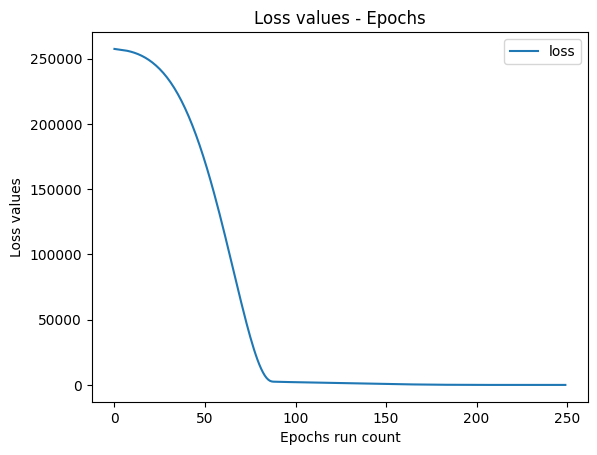

In [31]:
# plot the loss values
loss_df.plot()
plt.xlabel('Epochs run count')
plt.ylabel('Loss values')
plt.title('Loss values - Epochs')
plt.show();

* Here we can see the reduction in the loss values from the intial epoch runs 
* Reduction of loss values from very high to low is nature of NN

## Model Evaluation

In [33]:
# test score
model.evaluate(X_test, y_test, verbose=0)

25.60967445373535

* this basically gives the mse of the test data set, similary we can check for the train set

In [37]:
# train score
model.evaluate(X_train, y_train, verbose=0)

23.48525619506836

In [36]:
model.metrics_names

['loss']

### checking other metrics

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [38]:
test_preds = model.predict(X_test)

10/10 [==============================] - 0s 2ms/step


In [47]:
pd.Series(test_preds.reshape(300,))

0      513.436523
1      549.365784
2      512.989563
3      517.598694
4      550.276245
          ...    
295    428.492340
296    403.665649
297    577.452271
298    613.085815
299    627.665100
Length: 300, dtype: float32

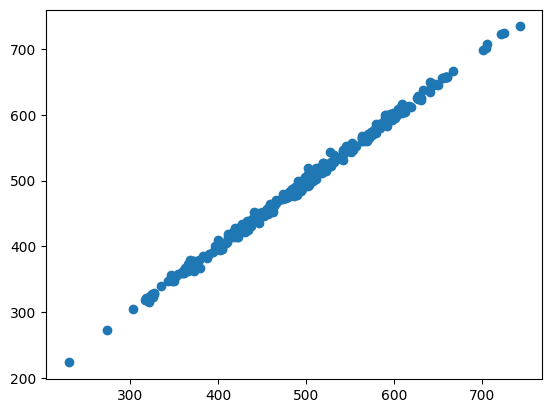

In [56]:
# we can see a perfect straight line relationship between our predicted values and the true test values
plt.scatter(test_preds, y_test)

In [79]:
# difference in prediction values and the true test values
errors = y_test.values - test_preds[:,0]
errors

array([ 4.91962082e+00,  2.28431594e+00, -1.62285516e+00,  5.29189542e-01,
       -2.65220186e+00, -2.62986805e+00,  1.48891847e+00,  7.52316591e+00,
       -3.85911851e+00,  1.49042029e+00, -1.05532058e+01, -7.44748040e+00,
       -3.54789134e+00,  4.33240677e+00, -3.35380167e+00,  2.87274352e-01,
       -9.76294425e-01, -1.10434636e+00, -4.78341162e+00,  1.16028252e+00,
        2.29704003e+00,  9.44826935e-02, -3.18341986e+00, -9.25769521e+00,
       -2.32904941e+00, -1.52596219e+00,  1.90128663e+00,  2.79925845e-01,
        3.76789132e+00,  1.64844408e+00,  8.05859852e+00, -7.86931971e-01,
       -2.83416060e+00,  3.42665274e+00, -6.66241573e-04, -7.41411691e+00,
        1.49900324e+00,  6.76207138e-01,  5.24568322e+00,  6.68883063e+00,
        9.78585483e+00,  1.62208501e+00,  3.65489435e+00,  5.03427118e-01,
       -1.76683157e+00, -2.33896439e-01,  2.33485333e+00, -3.24613829e+00,
       -1.01849427e+01, -4.90865411e+00, -2.59085033e+00, -6.88867625e+00,
       -6.76871627e+00, -

c:\users\budha\desktop\learnings\tensorflow\my_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

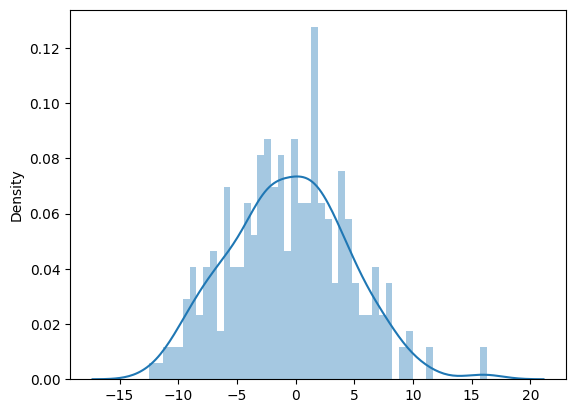

In [81]:
sns.distplot(errors, bins=50)

In [57]:
## get the train predictions as well
train_preds = model.predict(X_train)

22/22 [==============================] - 0s 1ms/step


In [58]:
# now we can check difference metrics
# training data metrics
mean_absolute_error(y_train, train_preds)

3.886893067815116

In [61]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


* Now if we look at the mean value of the price, it is around 499, and the standard deviation is around 94
* Our model give mse of around 4, which is approximately less than 1% of the mean value
* This model is performing really good

In [62]:
# similary for test
mean_absolute_error(y_test, test_preds)

4.071122189514939

In [63]:
# mean squared error
mean_squared_error(y_train, train_preds), mean_squared_error(y_test, test_preds)

(23.48525626505617, 25.6096738933028)

In [64]:
# root mean squared error
np.sqrt(mean_squared_error(y_train, train_preds)), np.sqrt(mean_squared_error(y_test, test_preds))

(4.846158918675302, 5.060600151494168)

In [85]:
## predict new value

new_gem = [[998, 1000]]

In [86]:
new_gem = scaler.transform(new_gem)

c:\users\budha\desktop\learnings\tensorflow\my_env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [87]:
model.predict(new_gem)

1/1 [==============================] - 0s 135ms/step


array([[419.5269]], dtype=float32)

### Saving and loading the model

In [82]:
from tensorflow.keras.models import load_model

In [83]:
# create hdf5 file
model.save('gem_price_pred.h5')

In [84]:
# load model

new_model = load_model('gem_price_pred.h5')

In [88]:
## predict using newly loaded model
new_model.predict(new_gem)

1/1 [==============================] - 0s 149ms/step


array([[419.5269]], dtype=float32)